In [1]:
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive connected.")
%cd ./drive/MyDrive/colab/tumor_classification/

Mounted at /content/drive
Google Drive connected.
/content/drive/MyDrive/colab/tumor_classification


In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri
!mkdir data
!unzip brain-tumor-classification-mri.zip -d data

In [2]:
!ls data

Testing  Training


In [3]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

REBUILD_DATA = False

class BrainTumorClassification():
  IMG_SIZE = 128
  GLIOMA = "/data/Training/glioma_tumor"
  MENINGIOMA = "/data/Training/meningioma_tumor"
  PITUITARY = "/data/Training/pituitary_tumor"
  NO = "/data/Training/no_tumor"
  TESTING_GLIOMA = "/data/Testing/glioma_tumor"
  TESTING_MENINGIOMA = "/data/Testing/meningioma_tumor"
  TESTING_PITUITARY = "/data/Testing/pituitary_tumor"
  TESTING_NO = "/data/Testing/no_tumor"
  LABELS = {'glioma_tumor':0, 'meningioma_tumor': 1, 'pituitary_tumor': 2, 'no_tumor': 3}
  training_data = []
  training_images = []
  training_labels = []
  testing_data = []
  testing_images = []
  testing_labels = []

  def make_training_data(self):
    for label in self.LABELS:
      for f in tqdm(os.listdir("data/Training/"+label)):
        if "jpg" in f:
          try:
            path = "data/Training/"+os.path.join(label, f)
            # sample execution (requires torchvision)
            img = Image.open(path)
            preprocess = transforms.Compose([
                transforms.Resize(256),
                #transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ])
            input_tensor = preprocess(img)
            self.training_images.append(input_tensor)
            self.training_labels.append(self.LABELS[label])
          except Exception as e:
            pass
    training_images, training_labels = shuffle(self.training_images, self.training_labels, random_state=0)
    torch.save(training_images, 'training_images.pt')
    torch.save(training_labels, 'training_labels.pt')
    #training_images = np.array(training_images)
    #training_labels = np.array(training_labels)
    #print(training_images.shape)
    #print(training_labels.shape)
    #np.save("training_images.npy", training_images)
    #np.save("training_labels.npy", training_labels)

  
  def make_testing_data(self):
    for label in self.LABELS:
      for f in tqdm(os.listdir("data/Testing/"+label)):
        if "jpg" in f:
          try:
            path = "data/Testing/"+os.path.join(label, f)
            #img = cv2.imread(path)
            #img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
            img = Image.open(path)
            preprocess = transforms.Compose([
                transforms.Resize(256),
                #transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ])
            input_tensor = preprocess(img)
            self.testing_images.append(input_tensor)
            self.testing_labels.append(self.LABELS[label])
          except Exception as e:
            pass
    testing_images, testing_labels = shuffle(self.testing_images, self.testing_labels, random_state=0)
    torch.save(testing_images, 'testing_images.pt')
    torch.save(testing_labels, 'testing_labels.pt')
    #testing_images = np.array(testing_images)
    #testing_labels = np.array(testing_labels)
    #print(testing_images.shape)
    #print(testing_labels.shape)
    #np.save("testing_images.npy", testing_images)
    #np.save("testing_labels.npy", testing_labels)
if REBUILD_DATA:
  btclass = BrainTumorClassification()
  btclass.make_training_data()
  btclass.make_testing_data()
  

In [ ]:
#training_images = np.load("training_images.npy", allow_pickle=True)
#training_labels = np.load("training_labels.npy", allow_pickle=True)

#testing_images = np.load("testing_images.npy", allow_pickle=True)
#testing_labels = np.load("testing_labels.npy", allow_pickle=True)

training_images = torch.load("training_images.pt")
training_labels = torch.load("training_labels.pt")

testing_images = torch.load("testing_images.pt")
testing_labels = torch.load("testing_labels.pt")

print("Loaded.")
#print("Shape of training_images: ",(training_images).shape," | Shape of training_labels:",(training_labels).shape,"|| Shape of testing_images: ", (testing_images).shape ," | Shape of testing_labels:",(testing_labels).shape)

Loaded.


In [4]:
import torch
import torchvision

preprocess = transforms.Compose([
                transforms.Resize((256,256)),
                #transforms.CenterCrop(224),
                transforms.ToTensor(),
                #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ])
trainset=torchvision.datasets.ImageFolder(root='data/Training/', transform=preprocess)
testset=torchvision.datasets.ImageFolder(root='data/Testing/', transform=preprocess)

trainloader=torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)
testloader=torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)


In [ ]:
import matplotlib.pyplot as plt


#X = torch.Tensor([i for i in training_images]).view(-1,128,128)
#train_X = X/255.0
#train_y = torch.Tensor([i for i in training_labels])

train_X = training_images
train_y = torch.Tensor([i for i in training_labels])

#X2 = torch.Tensor([i for i in testing_images]).view(-1,128,128)
#test_X = X2/255.0
#test_y = torch.Tensor([i for i in testing_labels])

test_X = testing_images
test_y = torch.Tensor([i for i in testing_labels])


print(len(train_X), len(test_X))

print(train_X[0])
#plt.imshow(X[0], cmap="gray")
#T.ToPILImage()(X[0])
#plt.imshow(  X[0].permute(1, 2, 0)  )

#print(training_labels[0])

2870 394
tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         ...,
         [-2.1008, -2.1008, -2.1008,  ..., -2.0665, -2.0665, -2.0665],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         ...,
         [-2.0182, -2.0182, -2.0182,  ..., -1.9832, -1.9832, -1.9832],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.7870, -1.7870, -1.7870,

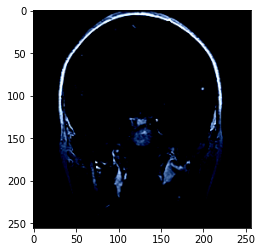

In [ ]:
plt.imshow(train_X[0].permute(1, 2, 0))

In [5]:
import torch.nn as nn
import torch.nn.functional as F
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the CPU


In [6]:
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.models import resnet50, ResNet50_Weights
from torch.optim.lr_scheduler import StepLR
from torch.nn import CrossEntropyLoss

NUM_CLASSES = 4

weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.fc = nn.Linear(2048, NUM_CLASSES)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
#print(model)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [7]:
EPOCHS = 10

def train(model):

  for epoch in range(EPOCHS):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 10:.3f}')
            running_loss = 0.0
  print('Finished Training')
train(model)

[1,    10] loss: 1.393
[1,    20] loss: 1.344
[1,    30] loss: 1.279
[1,    40] loss: 1.208
[1,    50] loss: 1.156
[1,    60] loss: 1.084


KeyboardInterrupt: ignored

In [ ]:
def test(net):
  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
    for data in testloader:
      images, labels = data
      images, labels = images.to(device), labels.to(device)
      # calculate outputs by running images through the network
      outputs = net(images)
      # the class with the highest energy is what we choose as prediction
      _, predicted = torch.max(outputs, 1)
      #print(f'Predicted:{predicted} Label:{labels}')
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print(f'Accuracy:{correct/total}')

test(model)

Accuracy:0.3629441624365482
